## imports

In [1]:
import os
import imageio
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.backends.cudnn as cudnn
import torchvision.utils as vutils
cudnn.benchmark = True

import pytorch3d
import pytorch3d.io


# some utility function for visualization
import utils
from utils.util_3d import init_mesh_renderer, sdf_to_mesh, add_mesh_textures

# some utility function
from utils.qual_util import save_mesh_as_gif
from IPython.display import Image as ipy_image
from IPython.display import display

%reload_ext autoreload
%autoreload 2

In [2]:
from utils.demo_util import get_shape_comp_opt
from utils.demo_util import get_shape_comp_model

""" setup dir """
res_dir = 'results'
if not os.path.exists(res_dir): os.mkdir(res_dir)

""" setup opt"""
gpu_id = 0
opt = get_shape_comp_opt(gpu_id=gpu_id)

""" setup different model """
model = get_shape_comp_model(opt)    
model.eval()

""" setup renderer """
dist, elev, azim = 1.7, 20, 110
mesh_renderer = init_mesh_renderer(image_size=256, dist=dist, elev=elev, azim=azim, device=opt.device)

jvermandere
gpuserver-0.geomatics.kuleuven.be
[*] Enc has Attn at i_level, i_block: 3, 0
Working with z of shape (1, 256, 8, 8, 8) = 131072 dimensions.
[*] Dec has Attn at i_level, i_block: 3, 0
[*] VQVAE: weight successfully load from: saved_ckpt/pvqvae-snet-all-LR1e-4-T0.2-rerun-epoch140.pth
[*] Model has been created: Rand-Transformer-Model
[*] "rand_tf" initialized.
[*] weight successfully load from: saved_ckpt/rand_tf-snet_code-all-LR1e-4-clean-epoch200.pth


## File Import

### Matterport

In [7]:
objectName = "table"

In [14]:
objectName = "cabinet"

In [3]:
objectName = "bed"

### ShapeNet

#### Chairs

In [3]:
# Chairs
objectCategory = "03001627"

In [4]:
# wooden Chair
objectName = "1a8bbf2994788e2743e99e0cae970928"

In [4]:
# Wood and fabric chair
objectName = "1a6f615e8b1b5ae4dbbc9440457e303e"

In [69]:
# 3 person sofa
objectName = "1a38407b3036795d19fb4103277a6b93"

In [67]:
# leather 1 person couch
objectName = "1b3c286bce219ddb7135fc51795b4038"

In [ ]:
# lounge chair
objectName = "1bcd9c3fe6c9087e593ebeeedbff73b"

In [9]:
# dish rotating chair
objectName = "1b05971a4373c7d2463600025db2266"

#### Tables

In [3]:
objectCategory = "04379243"

In [15]:
# Desk
objectName = "1a6aca00bbc88c7d30bbd4cddd04c77b"

In [7]:
# Table
objectName = "1a43bd2e53364313f51f77a6d7299806"

#### Cabinets

In [24]:
objectCategory = "02933112"

In [25]:
# Cabinet
objectName = "59e0e7f6eaa54e359cf7640f6c7f518b"

### File import

In [5]:
sdfPath = "/srvgentjkd98p2/L/Recordings/2015-01 ShapeNetCore/"+objectCategory+"/"+objectName+"/models/model_normalized_sdf.pt"
sdf = torch.load(sdfPath,map_location=torch.device('cuda'))

In [ ]:
sdfPath = "/srvgentjkd98p2/L/Recordings/2015-01 ShapeNetCore/evaluation/matterport/"+objectName+"/sdf.pt"
sdf = torch.load(sdfPath,map_location=torch.device('cuda'))

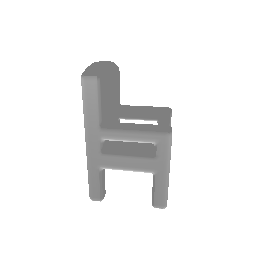

In [6]:
from utils.qual_util import get_partial_shape_by_range
gen_sdf_as_mesh = sdf_to_mesh(sdf) 

# save as gif
gif_name = f'{res_dir}/shape-example.gif'
save_mesh_as_gif(mesh_renderer, gen_sdf_as_mesh, nrow=1, out_name=gif_name)
ipy_image(gif_name)


## Sub selection

The range is an "and" selection, meaning selects voxel that comply to all of the given ranges, the ranges are clamped to a 0.25 interval
This is done by dividing the cube into an 8x8x8 sub-cube.
`get_partial_shape_by_range()` has a new `invert = False` flag, if set to true, the selection wil be inverted.

### Custom

In [6]:
completionPercent = "custom"
# range: -1 ~ 1.
# x: left-to-right; y: bottom-to-top; z: front-to-back
min_x, max_x = -1, 0.5
min_y, max_y = -1, 1.
min_z, max_z = -1., 1
input_range = {'x1': min_x, 'x2': max_x, 'y1': min_y, 'y2': max_y, 'z1': min_z, 'z2': max_z}

shape_comp_input = get_partial_shape_by_range(sdf, input_range, invert=False)

### 75%

In [16]:
completionPercent = "75"
# range: -1 ~ 1.
# x: left-to-right; y: bottom-to-top; z: front-to-back
min_x, max_x = -1., 0.
min_y, max_y = 0, 1.
min_z, max_z = -1., 1.
input_range = {'x1': min_x, 'x2': max_x, 'y1': min_y, 'y2': max_y, 'z1': min_z, 'z2': max_z}

shape_comp_input = get_partial_shape_by_range(sdf, input_range, invert=True)


### 50%

In [7]:
completionPercent = "50"
# range: -1 ~ 1.
# x: left-to-right; y: bottom-to-top; z: front-to-back
min_x, max_x = 0., 1.
min_y, max_y = -1, 1.
min_z, max_z = -1., 1.
input_range = {'x1': min_x, 'x2': max_x, 'y1': min_y, 'y2': max_y, 'z1': min_z, 'z2': max_z}

shape_comp_input = get_partial_shape_by_range(sdf, input_range)

### 25%

In [29]:
completionPercent = "25"
# range: -1 ~ 1.
# x: left-to-right; y: bottom-to-top; z: front-to-back
min_x, max_x = 0., 1.
min_y, max_y = 0., 1.
min_z, max_z = -1., 1.
input_range = {'x1': min_x, 'x2': max_x, 'y1': min_y, 'y2': max_y, 'z1': min_z, 'z2': max_z}

shape_comp_input = get_partial_shape_by_range(sdf, input_range)

## Completion

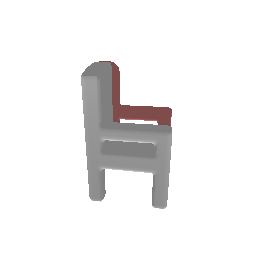

In [14]:

from utils.qual_util import get_shape_comp_input_mesh


input_mesh = get_shape_comp_input_mesh(shape_comp_input['sdf'], shape_comp_input['sdf_missing'])
# save as gif
gif_name = f'{res_dir}/shape-comp-struct-input-inp.gif'
save_mesh_as_gif(mesh_renderer, input_mesh, nrow=1, out_name=gif_name)
display(ipy_image(gif_name))


In [ ]:
""" perform shape completion """
input_mesh, comp_sdf = model.shape_comp(shape_comp_input, bs=9, topk=30)
gen_mesh = sdf_to_mesh(comp_sdf)          # completed shape
gen_gif_name = f'{res_dir}/shape-comp-struct-input-gen.gif'
save_mesh_as_gif(mesh_renderer, gen_mesh, nrow=3, out_name=gen_gif_name)
display(ipy_image(gen_gif_name))

## Save the meshes

In [8]:
saveFolderPath = res_dir + os.sep  +  objectName
if not os.path.exists(saveFolderPath): os.mkdir(saveFolderPath)

saveFolderPath = res_dir + os.sep  +  objectName + os.sep + completionPercent
if not os.path.exists(saveFolderPath): os.mkdir(saveFolderPath)
i=0
for mesh in gen_mesh:
    final_verts, final_faces = mesh.get_mesh_verts_faces(0)
    #pytorch3d.io.save_obj("../../datasets/Paper_examples/UnderTableChair_completed_" + str(i) + ".obj", final_verts, final_faces)
    #pytorch3d.io.save_obj("../../datasets/Paper_examples/Sofa_completed_" + str(i) + ".obj", final_verts, final_faces)
    #pytorch3d.io.save_obj("../../datasets/Paper_examples/gardenChair_completed_" + str(i) + ".obj", final_verts, final_faces)
    #pytorch3d.io.save_obj("../../datasets/Paper_examples/Blok_completed_" + str(i) + ".obj", final_verts, final_faces)
    pytorch3d.io.save_obj(saveFolderPath + os.sep + str(i) + ".obj", final_verts, final_faces)
    
    i+=1

## Full processing

In [33]:
from utils.qual_util import get_partial_shape_by_range

objectCategory = "03001627"
objectNames = [
    #"1a8bbf2994788e2743e99e0cae970928",
    #"1a6f615e8b1b5ae4dbbc9440457e303e",
    #"1b5e876f3559c231532a8e162f399205",
    #"1b05971a4373c7d2463600025db2266",
    #"1b80175cc081f3e44e4975e87c20ce53",
    "1bb81d54471d7c1df51f77a6d7299806",
    "1bcd9c3fe6c9087e593ebeeedbff73b"
]

for objectName in objectNames: 

    # import the sdf File
    sdfPath = "/srvgentjkd98p2/L/Recordings/2015-01 ShapeNetCore/"+objectCategory+"/"+objectName+"/models/model_normalized_sdf.pt"
    sdf = torch.load(sdfPath,map_location=torch.device('cuda'))

    gen_sdf_as_mesh = sdf_to_mesh(sdf)

    completionPercent = "75"
    min_x, max_x = -1., 0.
    min_y, max_y = 0, 1.
    min_z, max_z = -1., 1.
    input_range = {'x1': min_x, 'x2': max_x, 'y1': min_y, 'y2': max_y, 'z1': min_z, 'z2': max_z}
    shape_comp_input = get_partial_shape_by_range(sdf, input_range, invert=True)

    """ perform shape completion """
    input_mesh, comp_sdf = model.shape_comp(shape_comp_input, bs=9, topk=30)
    gen_mesh = sdf_to_mesh(comp_sdf)

    saveFolderPath = res_dir + os.sep  +  objectName
    if not os.path.exists(saveFolderPath): os.mkdir(saveFolderPath)
    saveFolderPath = res_dir + os.sep  +  objectName + os.sep + completionPercent
    if not os.path.exists(saveFolderPath): os.mkdir(saveFolderPath)
    i=0
    for mesh in gen_mesh:
        final_verts, final_faces = mesh.get_mesh_verts_faces(0)
        pytorch3d.io.save_obj(saveFolderPath + os.sep + str(i) + ".obj", final_verts, final_faces)
        i+=1
    print("completed 75%")

    completionPercent = "50"
    min_x, max_x = 0., 1.
    min_y, max_y = -1, 1.
    min_z, max_z = -1., 1.
    input_range = {'x1': min_x, 'x2': max_x, 'y1': min_y, 'y2': max_y, 'z1': min_z, 'z2': max_z}
    shape_comp_input = get_partial_shape_by_range(sdf, input_range)

    """ perform shape completion """
    input_mesh, comp_sdf = model.shape_comp(shape_comp_input, bs=9, topk=30)
    gen_mesh = sdf_to_mesh(comp_sdf)

    saveFolderPath = res_dir + os.sep  +  objectName
    if not os.path.exists(saveFolderPath): os.mkdir(saveFolderPath)
    saveFolderPath = res_dir + os.sep  +  objectName + os.sep + completionPercent
    if not os.path.exists(saveFolderPath): os.mkdir(saveFolderPath)
    i=0
    for mesh in gen_mesh:
        final_verts, final_faces = mesh.get_mesh_verts_faces(0)
        pytorch3d.io.save_obj(saveFolderPath + os.sep + str(i) + ".obj", final_verts, final_faces)
        i+=1
    print("completed 50%")

    completionPercent = "25"
    min_x, max_x = 0., 1.
    min_y, max_y = 0., 1.
    min_z, max_z = -1., 1.
    input_range = {'x1': min_x, 'x2': max_x, 'y1': min_y, 'y2': max_y, 'z1': min_z, 'z2': max_z}
    shape_comp_input = get_partial_shape_by_range(sdf, input_range)

    """ perform shape completion """
    input_mesh, comp_sdf = model.shape_comp(shape_comp_input, bs=9, topk=30)
    gen_mesh = sdf_to_mesh(comp_sdf)

    saveFolderPath = res_dir + os.sep  +  objectName
    if not os.path.exists(saveFolderPath): os.mkdir(saveFolderPath)
    saveFolderPath = res_dir + os.sep  +  objectName + os.sep + completionPercent
    if not os.path.exists(saveFolderPath): os.mkdir(saveFolderPath)
    i=0
    for mesh in gen_mesh:
        final_verts, final_faces = mesh.get_mesh_verts_faces(0)
        pytorch3d.io.save_obj(saveFolderPath + os.sep + str(i) + ".obj", final_verts, final_faces)
        i+=1
    print("completed 25%")

[*] autoregressively inferencing...: 100%|██████████| 128/128 [00:07<00:00, 18.02it/s]


completed 75%


[*] autoregressively inferencing...: 100%|██████████| 256/256 [00:11<00:00, 21.63it/s]


completed 50%


[*] autoregressively inferencing...: 100%|██████████| 384/384 [00:14<00:00, 26.45it/s]


completed 25%


[*] autoregressively inferencing...: 100%|██████████| 128/128 [00:07<00:00, 17.75it/s]


completed 75%


[*] autoregressively inferencing...: 100%|██████████| 256/256 [00:11<00:00, 21.41it/s]


completed 50%


[*] autoregressively inferencing...: 100%|██████████| 384/384 [00:14<00:00, 26.26it/s]


completed 25%
